<a href="https://colab.research.google.com/github/Swetha169-cse/NM-project-phase-3/blob/main/Road_safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the dataset
data = pd.read_csv('traffic_accident_data.csv')

In [ ]:
# Display basic info
print("Dataset Overview:")
print(data.head())

Dataset Overview:
             Date_Time         Location Weather_Conditions Road_Type  \
0  2022-10-21 03:00:00  City_0, State_0              Clear   Highway   
1  2021-02-05 20:00:00  City_1, State_1              Clear     Urban   
2  2022-04-16 04:00:00  City_2, State_2              Storm     Rural   
3  2021-09-19 01:00:00  City_3, State_3               Snow     Urban   
4  2022-12-04 02:00:00  City_4, State_4              Clear   Highway   

  Accident_Severity  Vehicles_Involved  Traffic_Volume Road_Surface_Condition  \
0             Minor                  1            1033                    Dry   
1             Minor                  4             798                    Icy   
2             Minor                  5            1216                  Snowy   
3             Minor                  3            1717                    Icy   
4             Minor                  2            1775                  Snowy   

         Lighting_Conditions  Speed_Limit Driver_Age_Group  \


In [ ]:
# Handle Missing Values (if any)
data.fillna(method='ffill', inplace=True)

<ipython-input-4-5380b71085f0>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# Encode Categorical Features
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Split the data
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

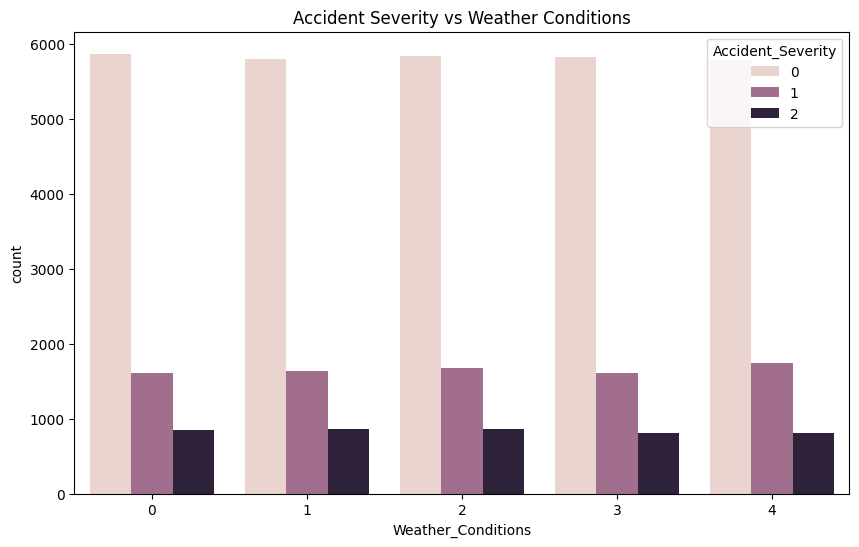

In [ ]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Weather_Conditions', hue='Accident_Severity')
plt.title('Accident Severity vs Weather Conditions')
plt.show()

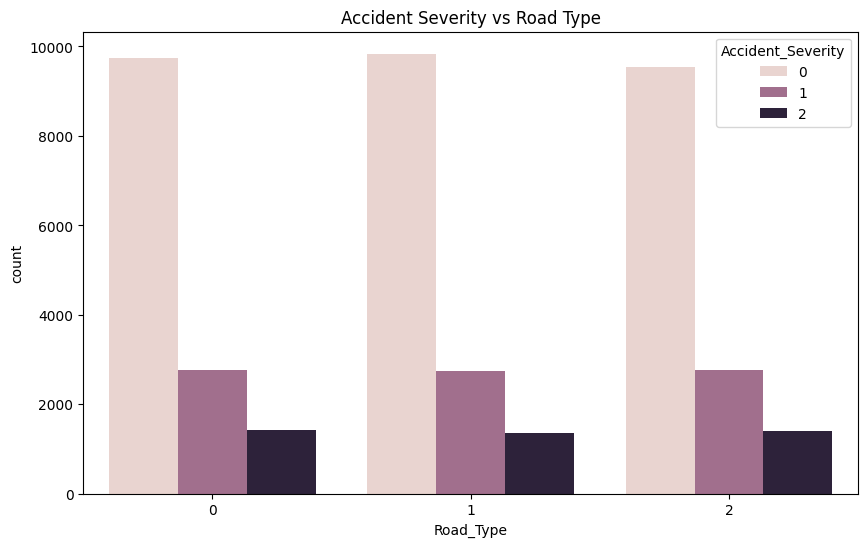

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Road_Type', hue='Accident_Severity')
plt.title('Accident Severity vs Road Type')
plt.show()

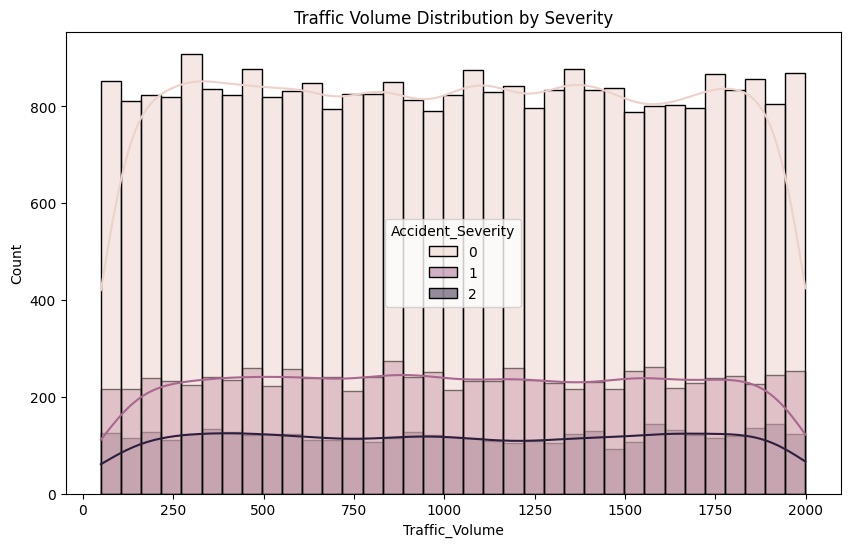

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Traffic_Volume', hue='Accident_Severity', kde=True)
plt.title('Traffic Volume Distribution by Severity')
plt.show()

In [ ]:
# Step 2: Model Training and Evaluation
# =============================

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [ ]:
# Model 1: RandomForest Classifier
print("Training RandomForest Model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Training RandomForest Model...


In [ ]:

print("RandomForest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      5833
           1       0.33      0.00      0.00      1624
           2       0.00      0.00      0.00       858

    accuracy                           0.70      8315
   macro avg       0.34      0.33      0.28      8315
weighted avg       0.56      0.70      0.58      8315

Accuracy: 0.7013830426939266


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

# Model 2: GradientBoosting Classifier
print("Training GradientBoosting Model...")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("GradientBoosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")

Training GradientBoosting Model...
GradientBoosting Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      5833
           1       0.00      0.00      0.00      1624
           2       0.00      0.00      0.00       858

    accuracy                           0.70      8315
   macro avg       0.23      0.33      0.27      8315
weighted avg       0.49      0.70      0.58      8315

Accuracy: 0.7009019843656044


In [ ]:
# Save Models
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
print("Models saved successfully!")

Models saved successfully!


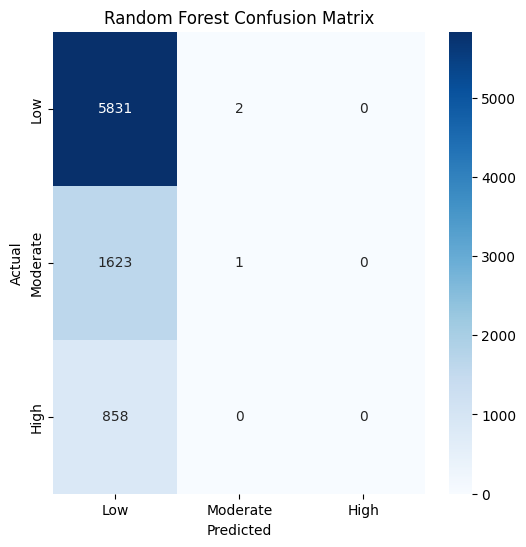

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

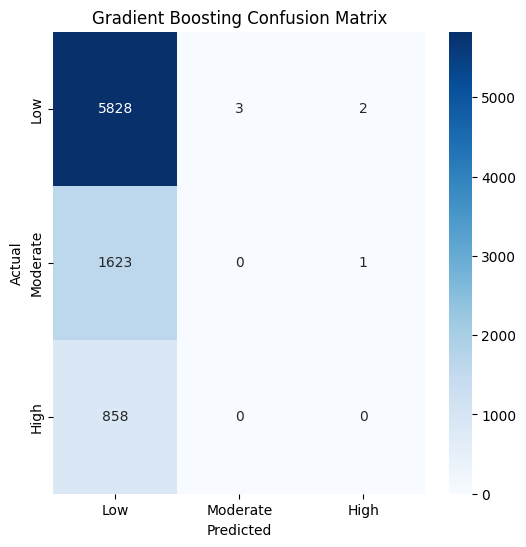

In [ ]:
# Confusion Matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Accuracy Comparison
rf_accuracy = accuracy_score(y_test, y_pred_rf)
gb_accuracy = accuracy_score(y_test, y_pred_gb)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Gradient Boosting Accuracy: {gb_accuracy}")

Random Forest Accuracy: 0.7013830426939266
Gradient Boosting Accuracy: 0.7009019843656044


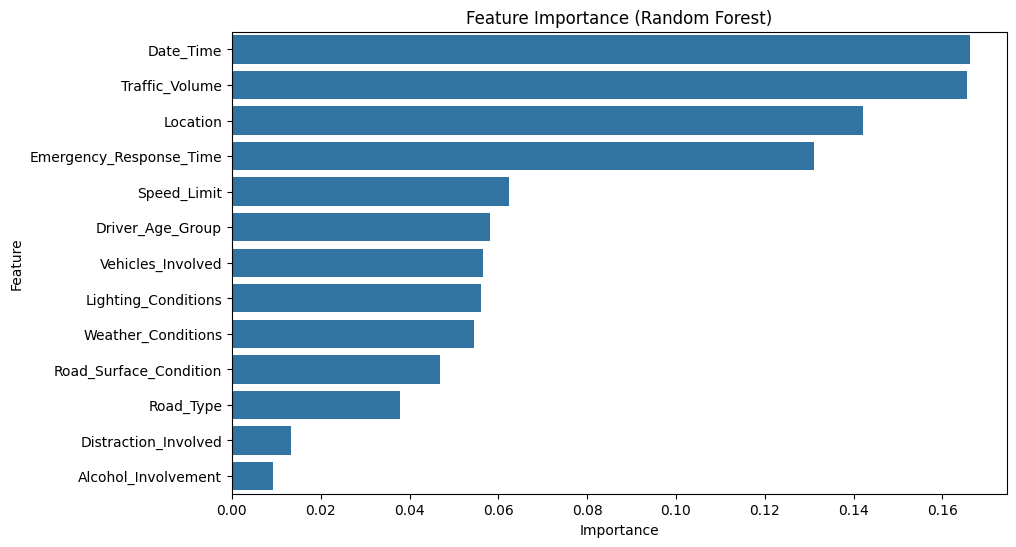

In [ ]:
# Feature Importance for RandomForest
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a dataframe for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


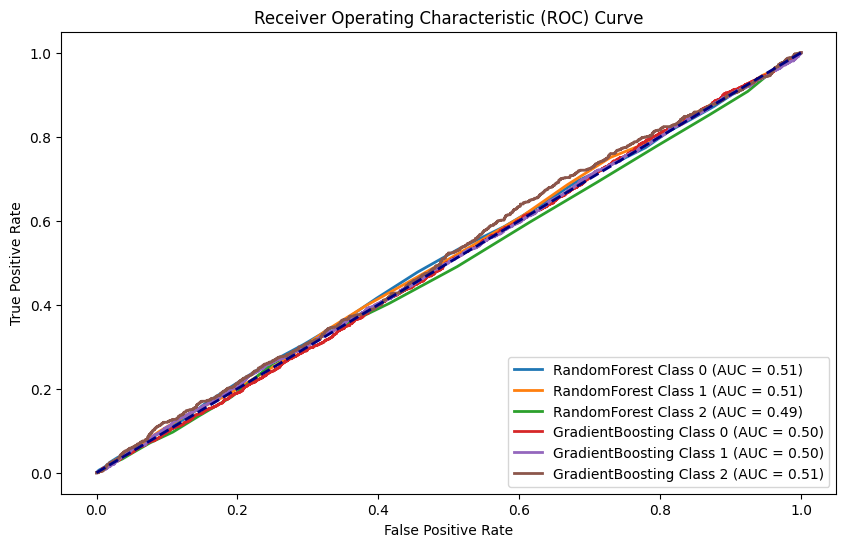

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output (one-vs-rest) for multi-class classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes: 0, 1, 2
n_classes = y_test_bin.shape[1]

# Predict probabilities for both models
y_pred_prob_rf = rf_model.predict_proba(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)

# Plot ROC Curve for each class
plt.figure(figsize=(10, 6))

# RandomForest ROC curve for each class
for i in range(n_classes):
    fpr_rf, tpr_rf, _ = roc_curve(y_test_bin[:, i], y_pred_prob_rf[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.plot(fpr_rf, tpr_rf, lw=2, label=f'RandomForest Class {i} (AUC = {roc_auc_rf:.2f})')

# GradientBoosting ROC curve for each class
for i in range(n_classes):
    fpr_gb, tpr_gb, _ = roc_curve(y_test_bin[:, i], y_pred_prob_gb[:, i])
    roc_auc_gb = auc(fpr_gb, tpr_gb)
    plt.plot(fpr_gb, tpr_gb, lw=2, label=f'GradientBoosting Class {i} (AUC = {roc_auc_gb:.2f})')

# Diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labeling and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
